In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from pylab import *

import json
import keras
import loadnotebook
from helper import * 


/home/izza/installdir/miniconda3/envs/stock/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from helper.ipynb


In [5]:
demo_config = {1 : [1, 2, 3, 4, 5, 6, 7], 
               2 : [1, 2, 3, 4, 5, 6],
               3 : [1, 2, 3, 4, 5, 6, 7],
               4 : [1, 2, 3, 4]}

df = get_data(config=demo_config, pure=True, refresh=True)
df_data = df
print(len(df_data))

helper.ipynb:428: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  "\n",


RSRP not found ../data/demo-priority1/set1/Peter.demo.502/18Jun07_113527/18Jun07_113527.1.nmf
RSRP not found ../data/demo-priority1/set1/Debby. demo505/18Jun07_132701/18Jun07_132701.1.nmf
RSRP not found ../data/demo-priority1/set2/Rose/18Jun08_154008/18Jun08_154008.1.nmf
RSRP not found ../data/demo-priority1/set2/Peter/18Jun08_144530/18Jun08_144530.1.nmf
RSRP not found ../data/demo-priority1/set4/reed/18Jun13_111024/18Jun13_111024.1.nmf
RSRP not found ../data/demo-priority1/set5/rose/18Jun13_151140/18Jun13_151140.1.nmf
not readable file ../data/demo-priority1/set6/reed/18Jun14_093921/18Jun14_093921.1.nmf
RSRP not found ../data/demo-priority2/set1/Reed/18Jun20_085001/18Jun20_085001.1.nmf
RSRP not found ../data/demo-priority2/set1/Reed/18Jun20_084707/18Jun20_084707.1.nmf
RSRP not found ../data/demo-priority2/set3/Rose/18Jun20_163022/18Jun20_163022.1.nmf
RSRP not found ../data/demo-priority2/set4/Rose/18Jun21_103616/18Jun21_103616.1.nmf
RSRP not found ../data/demo-priority2/set4/Reed/18Ju

# PCI Prediction 

In [46]:
whitelist_PCI = [301, 302, 120, 151, 154]
pci_data = df_data[df_data["PCI"].isin(whitelist_PCI)]
pci_data = pci_data.drop(["RSRP", "RSRQ", "SNR", "priority", "set"], axis=1)
pci_data = pci_data.drop_duplicates()
pci_data = pci_data.dropna()
pci_data

,location_x,location_y,PCI,Power_301,Power_302,301_beam0,301_beam32,301_beam64,301_beam96,301_beam128,302_beam0,302_beam32,302_beam64,302_beam96,302_beam128,Distance_301,Distance_302,Angle_301,Angle_302
0,754.0,217.0,302,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
0,776.0,218.0,302,-10,-10,1,0,0,0,0,1,0,0,0,0,93.941471,39.849718,101.668774,-107.525568
0,806.0,216.0,302,-10,-10,1,0,0,0,0,1,0,0,0,0,64.288413,68.731361,105.333285,-98.365886
0,832.0,216.0,302,-10,-10,1,0,0,0,0,1,0,0,0,0,39.812058,94.530418,115.277722,-96.072456
1,832.0,216.0,301,-10,-10,1,0,0,0,0,1,0,0,0,0,39.812058,94.530418,115.277722,-96.072456
0,700.0,217.0,302,-10,-10,1,0,0,0,0,1,0,0,0,0,168.961534,39.560081,96.115504,106.144339
0,684.0,218.0,302,-10,-10,1,0,0,0,0,1,0,0,0,0,184.978377,55.317267,95.895517,102.528808
3,684.0,218.0,120,-10,-10,1,0,0,0,0,1,0,0,0,0,184.978377,55.317267,95.895517,102.528808
11,684.0,218.0,301,-10,-10,1,0,0,0,0,1,0,0,0,0,184.978377,55.317267,95.895517,102.528808
0,728.0,217.0,302,-10,-10,1,0,0,0,0,1,0,0,0,0,141.152400,14.866069,97.326407,137.726311


In [47]:
pci_data.groupby(pci_data.PCI).size()

PCI
120     522
151     345
154     527
301     280
302    1284
dtype: int64

In [17]:
pci_data_301 = pci_data[pci_data["PCI"]==301]
pci_data_302 = pci_data[pci_data["PCI"]==302]
pci_data = pd.concat([pci_data_301, pci_data_302])

In [48]:
pci_encode = {k:v for k, v in zip(whitelist_PCI, range(0, len(whitelist_PCI)))}
pci_decode = {pci_encode[k]: k for k in pci_encode}
x_pci = pci_data.drop(["PCI"], axis=1)
y_pci = np.array(pci_data.PCI.apply(lambda x : pci_encode[x]).values.tolist())
x_pci_train, x_pci_test, y_pci_train, y_pci_test = train_test_split(x_pci, y_pci, test_size=0.3, random_state=32)

In [49]:
x_pci

,location_x,location_y,Power_301,Power_302,301_beam0,301_beam32,301_beam64,301_beam96,301_beam128,302_beam0,302_beam32,302_beam64,302_beam96,302_beam128,Distance_301,Distance_302,Angle_301,Angle_302
0,754.0,217.0,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
0,776.0,218.0,-10,-10,1,0,0,0,0,1,0,0,0,0,93.941471,39.849718,101.668774,-107.525568
0,806.0,216.0,-10,-10,1,0,0,0,0,1,0,0,0,0,64.288413,68.731361,105.333285,-98.365886
0,832.0,216.0,-10,-10,1,0,0,0,0,1,0,0,0,0,39.812058,94.530418,115.277722,-96.072456
1,832.0,216.0,-10,-10,1,0,0,0,0,1,0,0,0,0,39.812058,94.530418,115.277722,-96.072456
0,700.0,217.0,-10,-10,1,0,0,0,0,1,0,0,0,0,168.961534,39.560081,96.115504,106.144339
0,684.0,218.0,-10,-10,1,0,0,0,0,1,0,0,0,0,184.978377,55.317267,95.895517,102.528808
3,684.0,218.0,-10,-10,1,0,0,0,0,1,0,0,0,0,184.978377,55.317267,95.895517,102.528808
11,684.0,218.0,-10,-10,1,0,0,0,0,1,0,0,0,0,184.978377,55.317267,95.895517,102.528808
0,728.0,217.0,-10,-10,1,0,0,0,0,1,0,0,0,0,141.152400,14.866069,97.326407,137.726311


## Data Visualization 

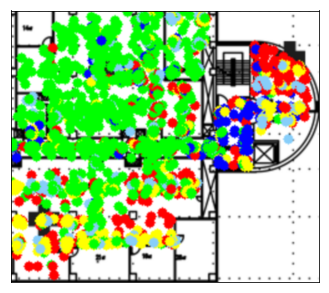

In [50]:
x_cut = 680  
y_cut = 100 
lon_list = [int(x-x_cut) for x in x_pci["location_x"]]
lat_list = [int(y-y_cut) for y in x_pci["location_y"]]
pci_color = [pci_color_dict[pci_decode[pci]] for pci in y_pci]

old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[y_cut:318, x_cut:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
crop = visualize(crop, lon_list, lat_list, pci_color, adjustment=False)

## Training Visualization 

2070


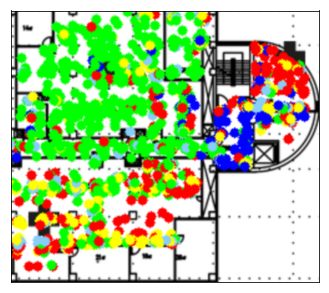

In [51]:
x_cut = 680  
y_cut = 100 
lon_list = [int(x-x_cut) for x in x_pci_train["location_x"]]
lat_list = [int(y-y_cut) for y in x_pci_train["location_y"]]
pci_color = [pci_color_dict[pci_decode[pci]] for pci in y_pci_train]
print(len(pci_color))
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[y_cut:318, x_cut:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
crop = visualize(crop, lon_list, lat_list, pci_color, adjustment=False)

## Testing Visualization 

888


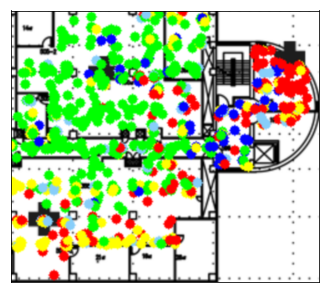

In [52]:
x_cut = 680  
y_cut = 100 
lon_list = [int(x-x_cut) for x in x_pci_test["location_x"]]
lat_list = [int(y-y_cut) for y in x_pci_test["location_y"]]
pci_color = [pci_color_dict[pci_decode[pci]] for pci in y_pci_test]
print(len(pci_color))
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[y_cut:318, x_cut:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
crop = visualize(crop, lon_list, lat_list, pci_color, adjustment=False)

## Generate all to be predicted data 

In [29]:
x_coord_list = []
y_coord_list = []
pci_list = []
for lon in range(0, crop.shape[1]) :
    for lat in range(0, crop.shape[0]) :
        x_coord_list.append(x_cut + lon)
        y_coord_list.append(y_cut + lat)

In [94]:
all_x_pci = pd.DataFrame({'location_x':x_coord_list, 'location_y':y_coord_list})
predicted_set_config = {1 : [1, 2],
                        2 : [1, 3]}

all_x_pci_dict = generate_predicted_data_pci(predicted_set_config, all_x_pci, False)

/home/izza/installdir/miniconda3/envs/stock/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # Remove the CWD from sys.path while we load stuff.


In [92]:
len(all_x_pci_dict)

4

In [93]:
all_x_pci_dict[(1, 2)]

,location_x,location_y,Power_301,Power_302,301_beam0,301_beam32,301_beam64,301_beam96,301_beam128,302_beam0,302_beam32,302_beam64,302_beam96,302_beam128,Distance_301,Distance_302,Angle_301,Angle_302
0,680,100,-10,-10,0,1,0,0,0,1,0,0,0,0,212.473528,120.830460,62.228900,28.686148
1,680,101,-10,-10,0,1,0,0,0,1,0,0,0,0,212.009434,119.954158,62.468023,28.915424
2,680,102,-10,-10,0,1,0,0,0,1,0,0,0,0,211.549049,119.079805,62.708191,29.148072
3,680,103,-10,-10,0,1,0,0,0,1,0,0,0,0,211.092397,118.207445,62.949403,29.384157
4,680,104,-10,-10,0,1,0,0,0,1,0,0,0,0,210.639502,117.337121,63.191656,29.623749
5,680,105,-10,-10,0,1,0,0,0,1,0,0,0,0,210.190390,116.468880,63.434949,29.866917
6,680,106,-10,-10,0,1,0,0,0,1,0,0,0,0,209.745083,115.602768,63.679279,30.113733
7,680,107,-10,-10,0,1,0,0,0,1,0,0,0,0,209.303607,114.738834,63.924644,30.364271
8,680,108,-10,-10,0,1,0,0,0,1,0,0,0,0,208.865986,113.877127,64.171043,30.618605
9,680,109,-10,-10,0,1,0,0,0,1,0,0,0,0,208.432243,113.017698,64.418471,30.876813


## Tensorflow 

In [33]:
import tensorflow as tf 

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features.to_dict('list')), labels))

    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels=None, batch_size=None):
    features = features.to_dict('list')
    """An input function for evaluation or prediction"""
    if labels is None:
        inputs = features
    else:
        inputs = (features, labels)

    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    return dataset.make_one_shot_iterator().get_next()

def dnn_model_fn(features, labels, mode, params) :
    net = tf.feature_column.input_layer(features, params['feature_columns'])
    for units in params['hidden_units']:
        net = tf.layers.dense(net, units=units, activation=tf.nn.relu)
    logits = tf.layers.dense(net, params['n_classes'], activation=None)
    
    # Compute predictions
    predicted_classes = tf.argmax(logits, 1)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        predictions = {
            'class_ids': predicted_classes[:, tf.newaxis],
            'probabilities': tf.nn.softmax(logits),
            'logits': logits,
        }
        return tf.estimator.EstimatorSpec(mode, predictions=predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    accuracy = tf.metrics.accuracy(labels=labels,
                               predictions=predicted_classes,
                               name='acc_op')
    
    metrics = {'accuracy': accuracy}
    tf.summary.scalar('accuracy', accuracy[1])

    if mode == tf.estimator.ModeKeys.EVAL:
        return tf.estimator.EstimatorSpec(mode, loss=loss, eval_metric_ops=metrics)
    
    optimizer = tf.train.AdagradOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op)

## Tensorflow DNN 

In [55]:
dnn_classifier = tf.estimator.Estimator(
    model_fn=dnn_model_fn,
    params={
        'feature_columns': [tf.feature_column.numeric_column(key=str(c)) for c in x_pci_train.columns],
        # Two hidden layers of 10 nodes each.
        'hidden_units': [32, 64, 32, 8],
        # The model must choose between 3 classes.
        'n_classes': len(pci_encode),
    })

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1afe2num', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f563952f0f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [56]:
dnn_classifier.train(
    input_fn=lambda:train_input_fn(x_pci_train, y_pci_train, 32),
    steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp1afe2num/model.ckpt.
INFO:tensorflow:loss = 34.444565, step = 1
INFO:tensorflow:global_step/sec: 719.114
INFO:tensorflow:loss = 1.4487737, step = 101 (0.140 sec)
INFO:tensorflow:global_step/sec: 1187.35
INFO:tensorflow:loss = 1.5100651, step = 201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1210.78
INFO:tensorflow:loss = 1.4119792, step = 301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1021.4
INFO:tensorflow:loss = 1.4857721, step = 401 (0.098 sec)
INFO:tensorflow:global_step/sec: 1314.03
INFO:tensorflow:loss = 1.2875495, step = 501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1256.8
INFO:tensorflow:loss = 1.3987825, step = 601 (0.080 sec)
INFO:tensorflow:global_step/sec: 1316.37
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 794.27
INFO:tensorflow:loss = 1.2701633, step = 8101 (0.109 sec)
INFO:tensorflow:global_step/sec: 1146.06
INFO:tensorflow:loss = 1.6527572, step = 8201 (0.087 sec)
INFO:tensorflow:global_step/sec: 1096.44
INFO:tensorflow:loss = 1.368824, step = 8301 (0.092 sec)
INFO:tensorflow:global_step/sec: 1036.61
INFO:tensorflow:loss = 1.4178971, step = 8401 (0.096 sec)
INFO:tensorflow:global_step/sec: 1027.79
INFO:tensorflow:loss = 1.4572277, step = 8501 (0.097 sec)
INFO:tensorflow:global_step/sec: 1197.12
INFO:tensorflow:loss = 1.5012562, step = 8601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1061.74
INFO:tensorflow:loss = 1.3818007, step = 8701 (0.094 sec)
INFO:tensorflow:global_step/sec: 1222.27
INFO:tensorflow:loss = 1.5068312, step = 8801 (0.082 sec)
INFO:tensorflow:global_step/sec: 1226.3
INFO:tensorflow:loss = 1.4491314, step = 8901 (0.081 sec)
INFO:tensorflow:global_step/sec: 1176.13
INFO:tensorflow:loss = 1.6370436, step = 9001 (0.085 sec)
INFO:tensorfl

In [57]:
eval_result = dnn_classifier.evaluate(
    input_fn=lambda:eval_input_fn(x_pci_test, y_pci_test, 700))

eval_result

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-12-02:26:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1afe2num/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-12-02:26:34
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.4391892, global_step = 10000, loss = 1.4273617


{'accuracy': 0.4391892, 'loss': 1.4273617, 'global_step': 10000}

In [158]:
est_tensor_predictions = {set_val:dnn_classifier.predict(
    input_fn=lambda:eval_input_fn(all_x_pci_dict[set_val], batch_size=10)) for set_val in all_x_pci_dict}

In [154]:
all_y_pci_tensor = {}
for key in est_tensor_predictions :
    all_y_pci_tensor[key] = [p['class_ids'][0] for p in est_tensor_predictions[key]]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1afe2num/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1afe2num/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1afe2num/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1afe2num/model.ckpt-10000
INFO:te

In [60]:
for set_val in all_y_pci_tensor :
    y_pred = all_y_pci_tensor[set_val]
    print(str(set_val) + ":" + str(np.unique(y_pred, return_counts=True)))

(1, 1):(array([1]), array([53846]))
(1, 2):(array([1]), array([53846]))
(2, 1):(array([1]), array([53846]))
(2, 3):(array([1]), array([53846]))


## Keras MLP  

In [62]:
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization

input_dims = len(x_pci_train.columns)
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=input_dims))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(pci_encode), activation='softmax'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train_categorical = keras.utils.to_categorical(y_pci_train, num_classes=len(pci_encode))
model.fit(np.array(x_pci_train.values.tolist()), y_train_categorical, epochs=100, batch_size=128)

Epoch 1/100
2070/2070 [==============================] - 1s 416us/step - loss: 1.9312 - acc: 0.2478
Epoch 2/100
2070/2070 [==============================] - 0s 30us/step - loss: 1.7017 - acc: 0.2966
Epoch 3/100
2070/2070 [==============================] - 0s 24us/step - loss: 1.5662 - acc: 0.3676
Epoch 4/100
2070/2070 [==============================] - 0s 26us/step - loss: 1.5304 - acc: 0.3928
Epoch 5/100
2070/2070 [==============================] - 0s 28us/step - loss: 1.4810 - acc: 0.3942
Epoch 6/100
2070/2070 [==============================] - 0s 23us/step - loss: 1.4493 - acc: 0.4232
Epoch 7/100
2070/2070 [==============================] - 0s 25us/step - loss: 1.4376 - acc: 0.4251
Epoch 8/100
2070/2070 [==============================] - 0s 25us/step - loss: 1.4201 - acc: 0.4444
Epoch 9/100
2070/2070 [==============================] - 0s 26us/step - loss: 1.4164 - acc: 0.4367
Epoch 10/100
2070/2070 [==============================] - 0s 26us/step - loss: 1.4091 - acc: 0.4483
Epoch 11

2070/2070 [==============================] - 0s 26us/step - loss: 1.2184 - acc: 0.5145
Epoch 84/100
2070/2070 [==============================] - 0s 25us/step - loss: 1.2294 - acc: 0.5019
Epoch 85/100
2070/2070 [==============================] - 0s 27us/step - loss: 1.2457 - acc: 0.5101
Epoch 86/100
2070/2070 [==============================] - 0s 26us/step - loss: 1.2223 - acc: 0.5116
Epoch 87/100
2070/2070 [==============================] - 0s 29us/step - loss: 1.2331 - acc: 0.5155
Epoch 88/100
2070/2070 [==============================] - 0s 25us/step - loss: 1.2462 - acc: 0.5145
Epoch 89/100
2070/2070 [==============================] - 0s 24us/step - loss: 1.2379 - acc: 0.5048
Epoch 90/100
2070/2070 [==============================] - 0s 25us/step - loss: 1.2383 - acc: 0.5072
Epoch 91/100
2070/2070 [==============================] - 0s 25us/step - loss: 1.2393 - acc: 0.5010
Epoch 92/100
2070/2070 [==============================] - 0s 27us/step - loss: 1.2268 - acc: 0.5140
Epoch 93/100


In [64]:
y_test_categorical = keras.utils.to_categorical(y_pci_test, num_classes=len(pci_encode))
score = model.evaluate(x_pci_test, y_test_categorical, batch_size=128)
score

888/888 [==============================] - 0s 109us/step


[1.1538303306510858, 0.588963963963964]

In [65]:
all_y_pci_keras = {set_val:model.predict(all_x_pci_dict[set_val]) for set_val in all_x_pci_dict}

In [66]:
all_y_pci_keras = {set_val:np.argmax(all_y_pci_keras[set_val], axis=1) for set_val in all_y_pci_keras}

In [67]:
for set_val in all_y_pci_keras :
    y_pred = all_y_pci_keras[set_val]
    print(str(set_val) + ":" + str(np.unique(y_pred, return_counts=True)))

(1, 1):(array([0, 1, 2, 4]), array([ 5838, 27329, 14208,  6471]))
(1, 2):(array([0, 1, 2, 4]), array([ 5659, 26877, 14518,  6792]))
(2, 1):(array([0, 1, 2, 4]), array([ 5093, 25890, 15093,  7770]))
(2, 3):(array([0, 1, 2, 4]), array([ 4857, 25703, 15348,  7938]))


In [350]:
all_y_pci_keras = {key:all_y_pci_keras[key].tolist() for key in all_y_pci_keras}

## Edward Bayesian 

In [78]:
N = len(x_pci_train["location_x"])  # number of data ponts
D = len(x_pci_train.columns)   # number of features

# from model_source import *

In [79]:
# model = BayesianModel(D, output)

## Visualize Prediction 

In [68]:
old_origin_img = cv2.imread('../image/map.png',0)
def show_pci_heatmap(pci_pred) :
    print(str(np.unique(pci_pred, return_counts=True)))
    crop = old_origin_img[y_cut:318, x_cut:927]
    rgb = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
    color_img = np.array(rgb)
    for lon, lat, pci_code in zip(x_coord_list, y_coord_list, pci_pred) :
        pci = pci_decode[pci_code]
        colour = pci_color_dict[pci]
        color_img = cv2.circle(color_img, (lon-x_cut, lat-y_cut), 5, colour, -1)

    alpha = 0.7
    final = cv2.addWeighted(rgb, alpha, color_img, 1 - alpha, alpha)
    plt.imshow(final, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    
    return final 

In [351]:
all_y_pci = all_y_pci_keras

(array([0, 1, 2, 4]), array([ 4857, 25703, 15348,  7938]))


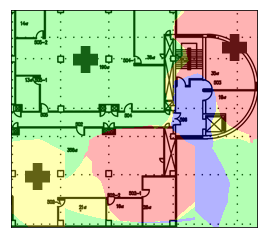

In [86]:
p = 2
s = 3
a = show_pci_heatmap(all_y_pci[(p,s)])

In [87]:
bgr = cv2.cvtColor(a, cv2.COLOR_RGB2BGR)
cv2.imwrite("../results/predicted/pci/priority_"+str(p)+"_set_"+str(s)+".png", bgr)

True

In [358]:
save_to_pickle(all_y_pci, "predicted_pci_keras")

(array([0, 1, 2, 4]), array([ 5659, 26877, 14518,  6792]))


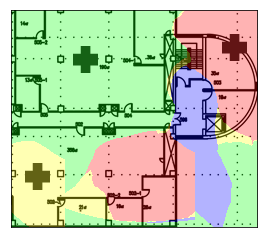

In [359]:
saved_all_y_pci = load_from_pickle("predicted_pci_keras")
_ = show_pci_heatmap(saved_all_y_pci[(1,2)])